In [1]:
%load_ext autoreload
%autoreload 2
from decoder_utils import *
from pprint import pprint
import pickle
import pandas as pd
import seaborn as sns

C:\Users\Can\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def nbget_random_sample(X,X_v,X_t,N_neuron):

    total_N = X.shape[-1]
    #print(total_N)
    random_neuron_set = np.random.choice(np.arange(total_N), N_neuron, replace=False)
    X_random=X[:,random_neuron_set]
    X_v_random=X_v[:,random_neuron_set]
    X_t_random=X_t[:,random_neuron_set]
    
    return X_random, X_v_random,X_t_random

In [3]:
def remove_head_tail(train_group_X):

    A=np.delete(train_group_X,1,0)
    A=np.delete(A,A.shape[0]-1,0)
    
    return A

In [4]:
def get_lap_score(X,y,clf,lap_num):
    lap_score=np.zeros(lap_num)
    lap_diff=np.zeros(lap_num)
    for i in range(lap_num):
        
        lap_y_test=y[100*(i):100*(i+1)-1]
        lap_X_b_test=X[100*i:100*(i+1)-1,:]
        #print([100*(i):100*(i+1)-1])
        #print(i)
        res=clf.predict(lap_X_b_test)
        
        #if i==lap_id.shape[0]-2:
        #plt.figure
        #print(len(lap_y_test[bins_before:-bins_after-1]))
        #print(len(y_test_pre_inverse))
        lap_score[i] = sklearn.metrics.r2_score(lap_y_test,res)
        lap_diff[i] = sklearn.metrics.mean_absolute_error(lap_y_test,res)
        
    return lap_score, lap_diff
    
        
    

In [5]:
pkl_file = open('CA1_beh_nday1_new_onePF_all.pkl', 'rb')
G_CA3 = pickle.load(pkl_file)
pkl_file.close()

In [6]:
session_type=2
#train_range2 = (82, 122)
#test_range2 = (61,81)
#valid_range2 = (135,145 )
validation_lap_num=50
train_lap_num=35
test_lap_num=5
valid_lap_num=5
# train_range = (60, 100)
# test_range = (1,59)
# valid_range = (100,109 )
bins_before=1 #How many bins of neural data prior to the output are used for decoding
bins_current=1 #Whether to use concurrent time bin of neural data
bins_after=1 #How many bins of neural data after the output are used for decoding
group_bin=100
bin_num=50

start 46
poses 0.004385067691802979 0.6404690606689453
start 46
poses 0.0046902807259559635 0.6394923789596557
start 46
poses 0.00456819551229477 0.6402248604393005
start 50
poses 0.007986581494808197 0.6439484818077087
start 50
poses 0.008627528866529465 0.6430328352546691
start 50
poses 0.007772932370901108 0.6430328352546691
start 45
poses 0.006842032616734505 0.6424986882305145
start 45
poses 0.007254070212841034 0.6433990461921691
start 45
poses 0.007284591516256333 0.6422545178031921
start 37
poses 0.003835684230327606 0.6392481787300109
start 37
poses 0.004201939871311188 0.6376000506973266
start 37
poses 0.0037949891591072082 0.6389429433441162


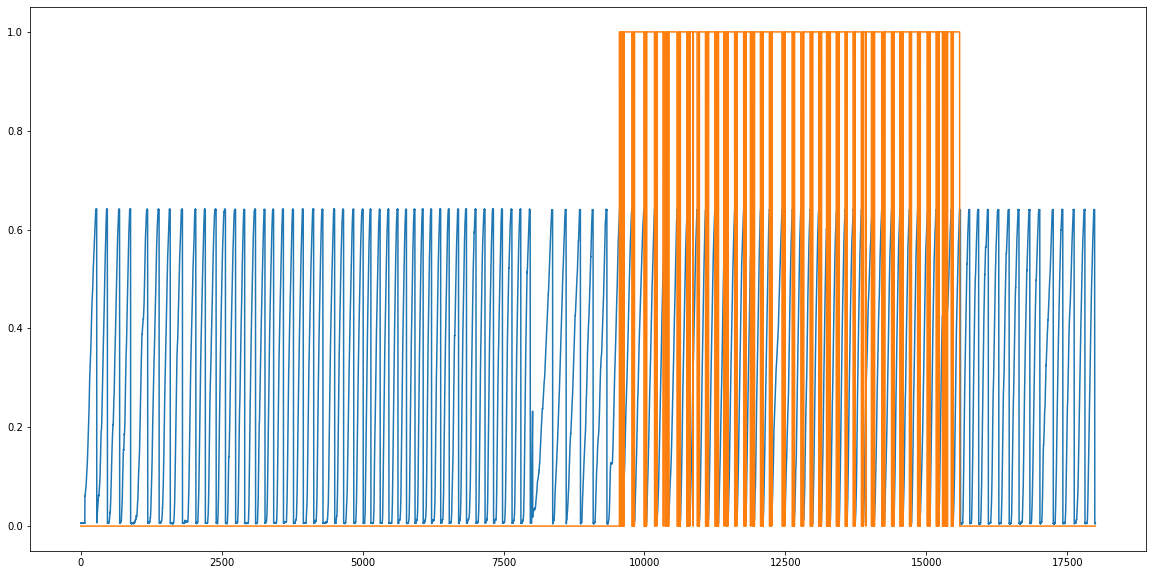

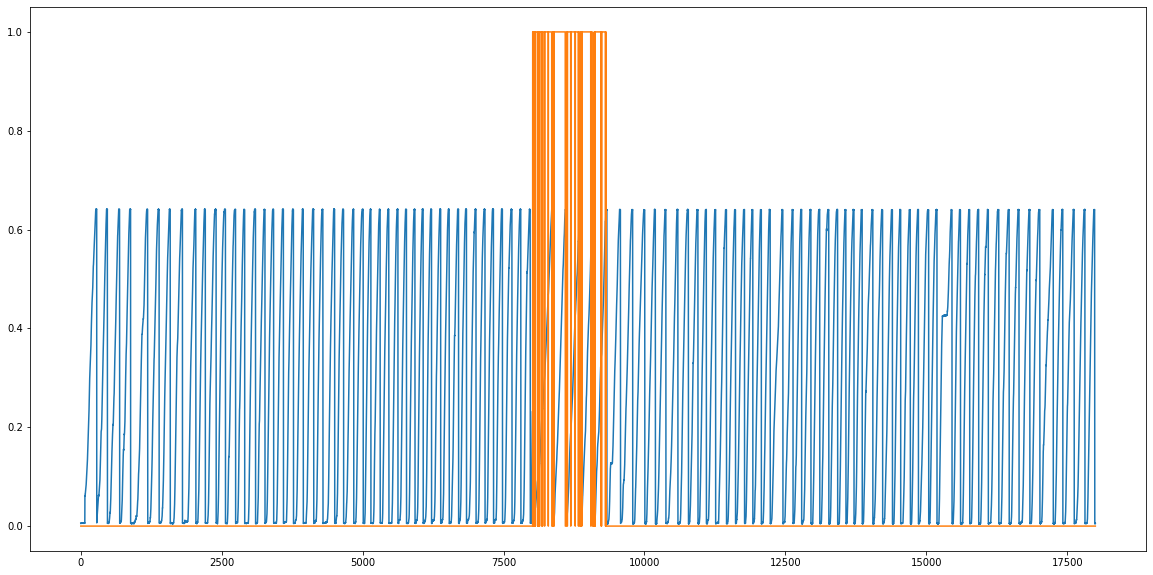

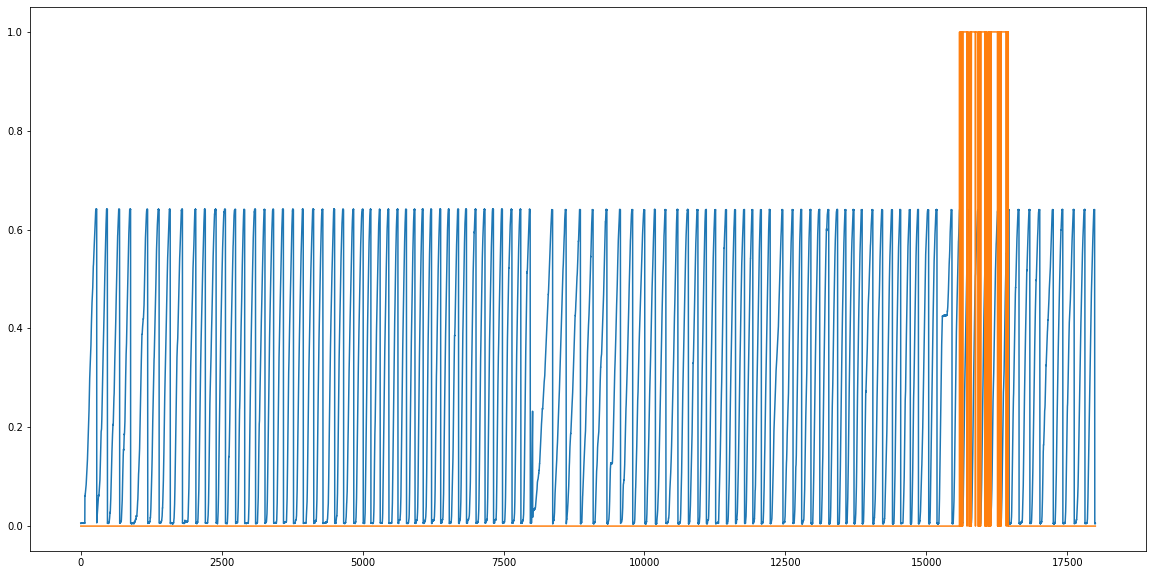

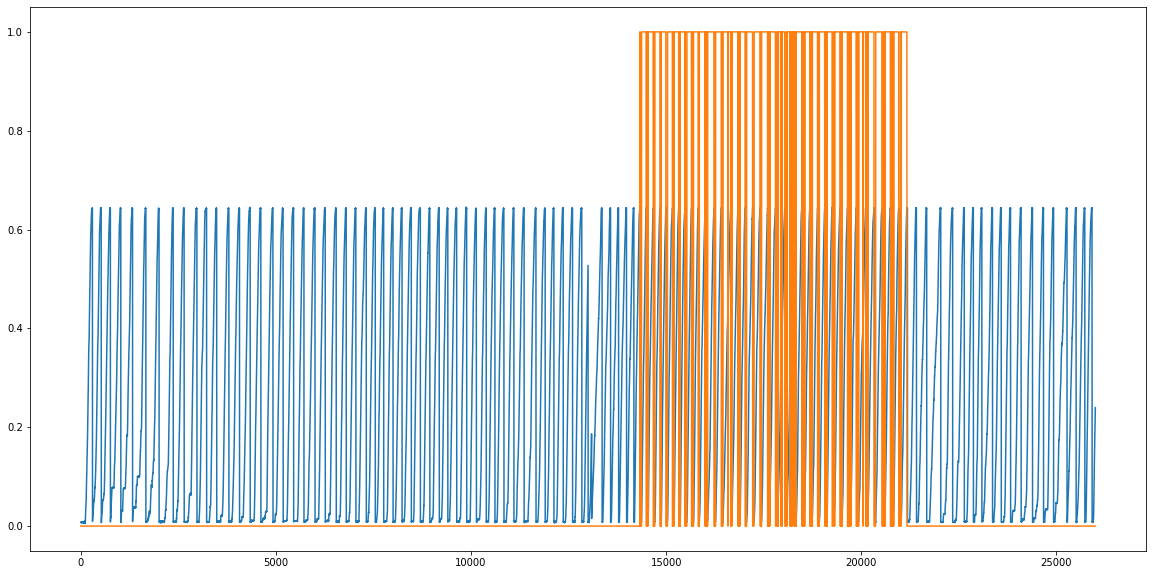

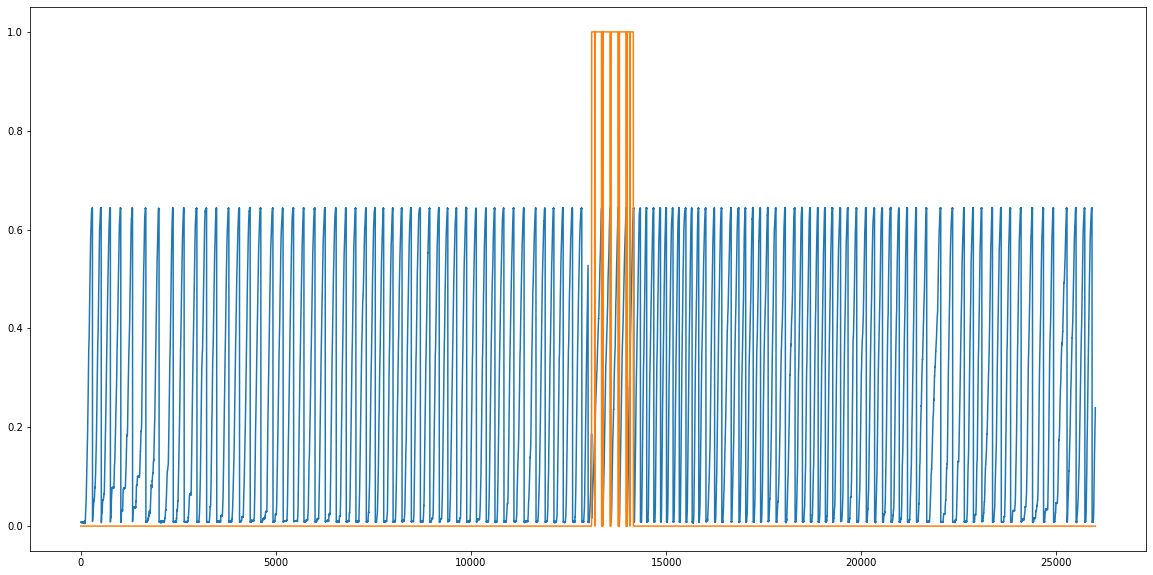

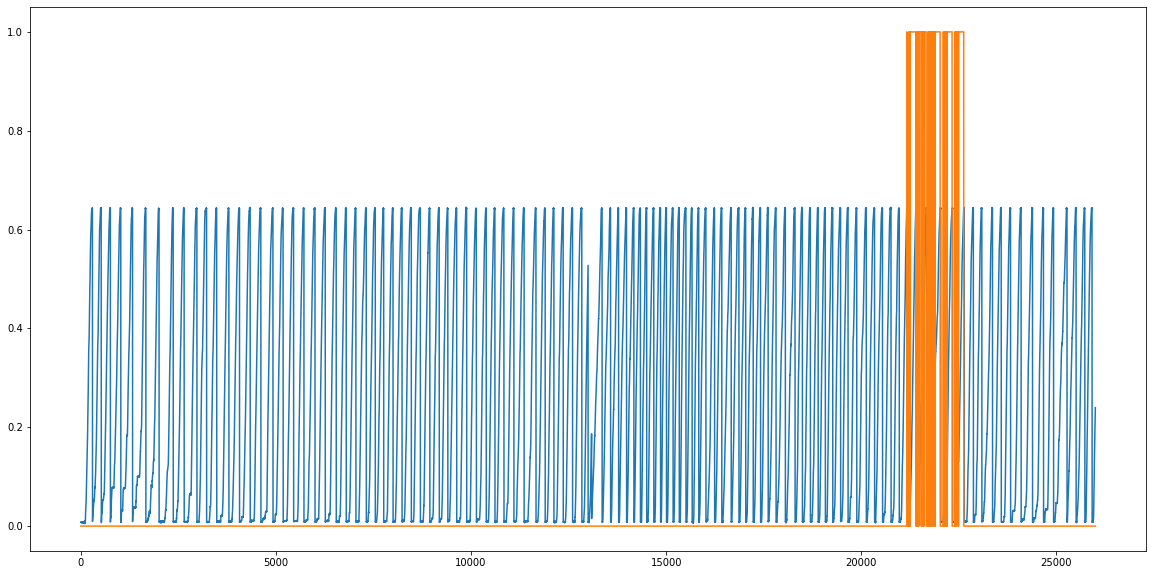

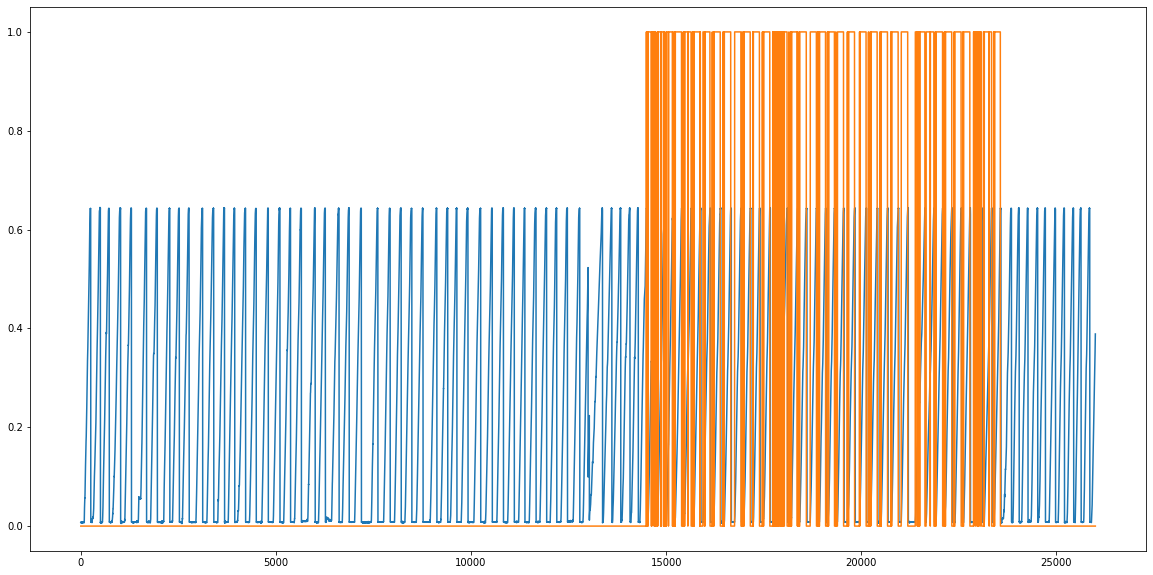

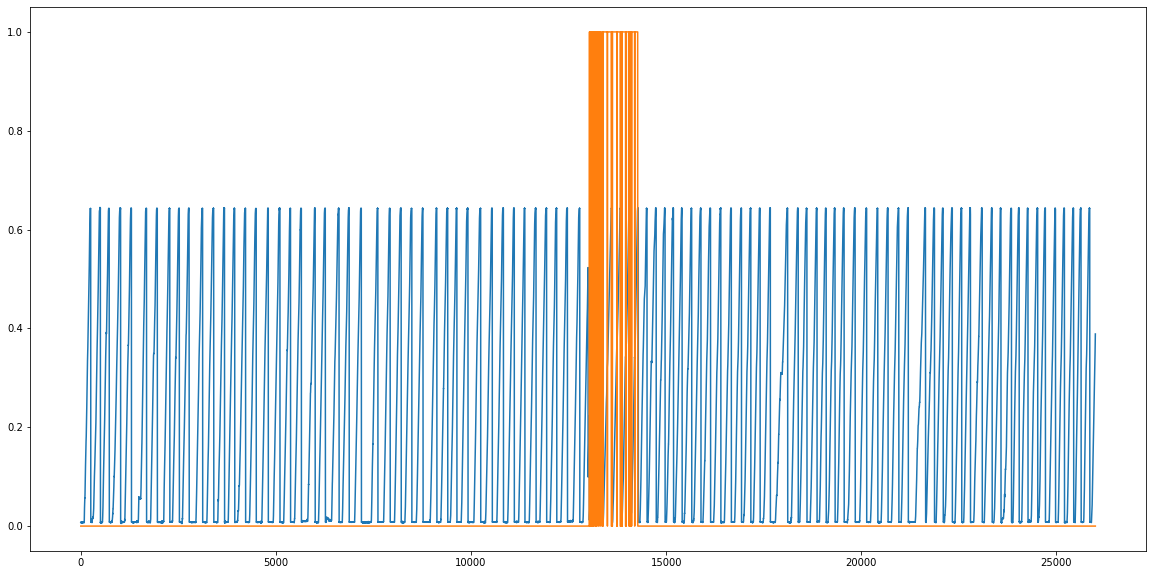

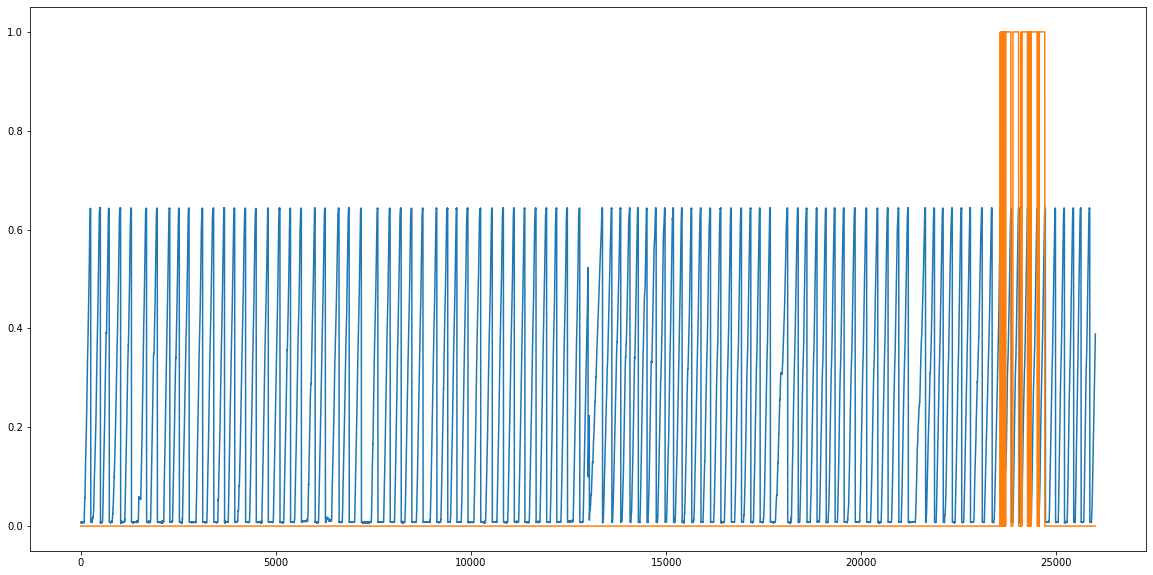

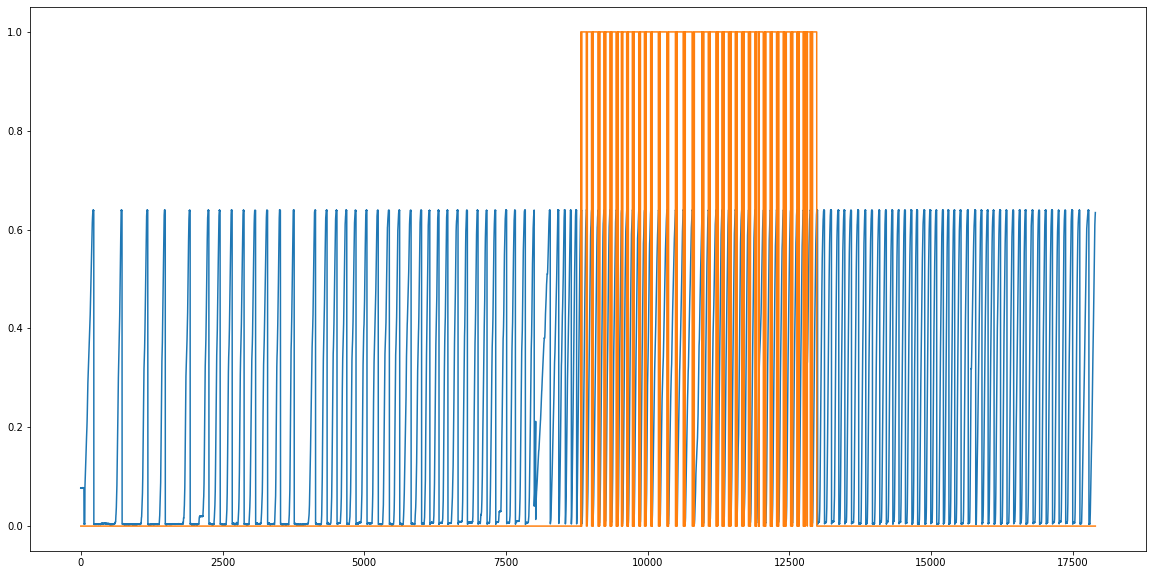

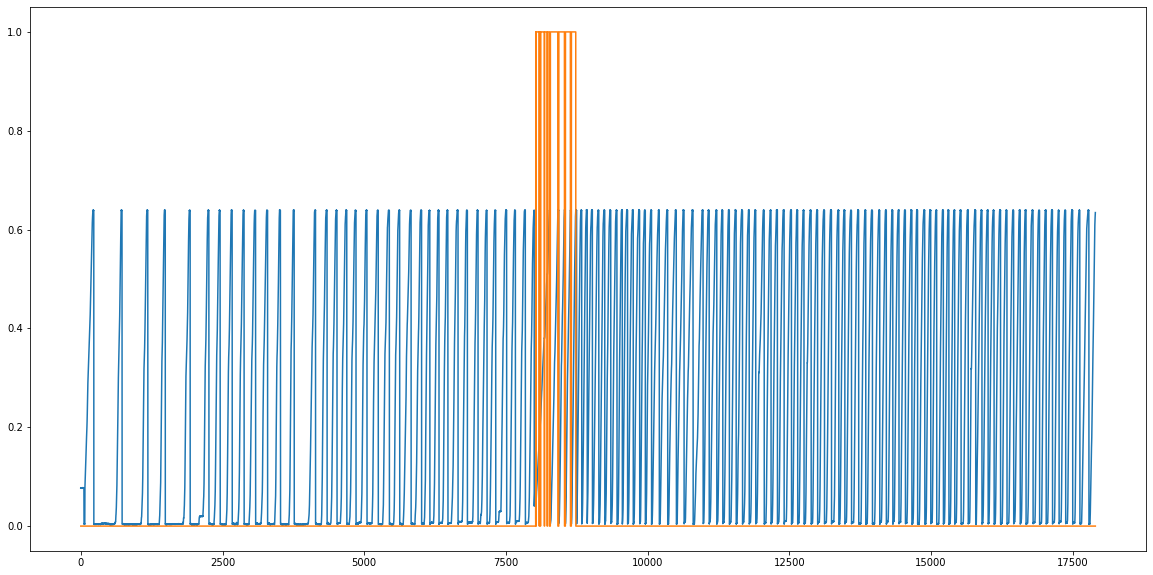

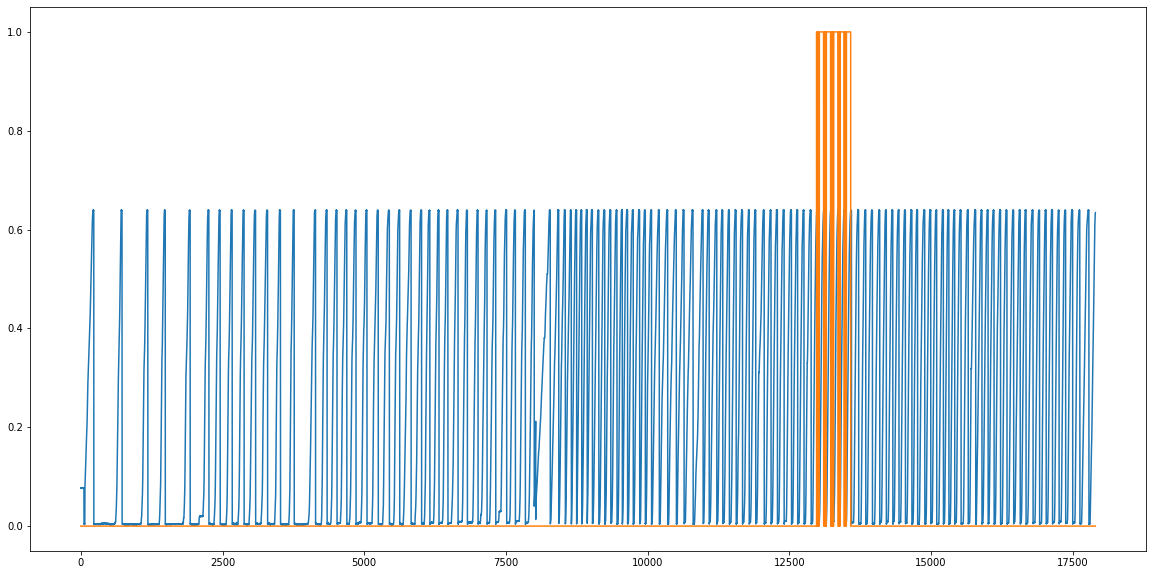

In [7]:
train_group_X=np.array([])
test_group_X=np.array([])
valid_group_X=np.array([])
PC_id=np.array([])
for key in G_CA3.keys():
    train_range=(G_CA3[key]['familiar_lap']+test_lap_num+1,G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+1)
    test_range=(G_CA3[key]['familiar_lap']+1,G_CA3[key]['familiar_lap']+test_lap_num+1)
    valid_range=(G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+1,G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+valid_lap_num+1)
    
    exp=G_CA3[key]['exp']
    pc_id=exp['PC_id']
    
    X_train,y_train,traingroup_X,train_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,session_type,bin_num,train_range)
    X_test,y_test,testgroup_X,test_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,2,bin_num,test_range)
    X_valid,y_valid,validgroup_X,valid_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,session_type,bin_num,valid_range)
    #test_group_pos[0:8]=1
    #print(test_group_pos)
    train_group_X = np.hstack((train_group_X, traingroup_X)) if train_group_X.size else traingroup_X
    test_group_X = np.hstack((test_group_X, testgroup_X)) if test_group_X.size else testgroup_X
    valid_group_X = np.hstack((valid_group_X, validgroup_X))if valid_group_X.size else validgroup_X
    PC_id = np.hstack((PC_id, pc_id))if PC_id.size else pc_id
    
train_group_X=remove_head_tail(train_group_X)
test_group_X=remove_head_tail(test_group_X)
valid_group_X=remove_head_tail(valid_group_X)
train_group_pos=remove_head_tail(train_group_pos)
test_group_pos=remove_head_tail(test_group_pos)
valid_group_pos=remove_head_tail(valid_group_pos)

In [8]:
ca1_X=train_group_X[:,PC_id==True]
ca1v_X=valid_group_X[:,PC_id==True]
ca1t_X=test_group_X[:,PC_id==True]
PC_num=200

trail_num=20;
score=np.zeros([trail_num,1])
diff=np.zeros([trail_num,1])
CA1_epoch_data_result=[]
for i in range (1):
    for trail in range(trail_num):

        CA1_X,CA1v_X,CA1t_X=nbget_random_sample(ca1_X,ca1v_X,ca1t_X,PC_num)
        #print(CA1_X.shape)

        from sklearn.naive_bayes import GaussianNB
        clf_ca1 = GaussianNB()
        clf_ca1.fit(CA1_X, train_group_pos)

        res_test = clf_ca1.predict(CA1t_X)
        res_valid = clf_ca1.predict(CA1v_X)
        valid_score = sklearn.metrics.r2_score(valid_group_pos, res_valid)
        print(valid_score)
        score[trail,i]  = sklearn.metrics.r2_score(test_group_pos, res_test)
        
        lap_s_v,lap_abs_d_v=get_lap_score(CA1v_X,valid_group_pos,clf_ca1,valid_lap_num)
        lap_s_test,lap_abs_d_test=get_lap_score(CA1t_X,test_group_pos,clf_ca1,test_lap_num)
        lap_s_train,lap_abs_d_train=get_lap_score(CA1_X,train_group_pos,clf_ca1,train_lap_num)

        CA1_epoch_data_result.append(dict(v_score=lap_s_v,v_abs_diff=lap_abs_d_v,
                                test_score=lap_s_test, test_abs_diff=lap_abs_d_test,
                                train_score=lap_s_train, train_abs_diff=lap_abs_d_train,
                                trail=trail))
        
        
        

0.9140640506200038
0.934144609708909
0.9098826034186281
0.7581777764482591
0.8515153680008053
0.8332227380600745
0.8479491222267584
0.738154892493166
0.9298958748514192
0.894204579544045
0.9019042099079574
0.8237832411594979
0.8908594217829444
0.854937425940322
0.8377694611089267
0.8459497175879398
0.946688951313036
0.7528332140483399
0.8976266374835616
0.9350193492383921


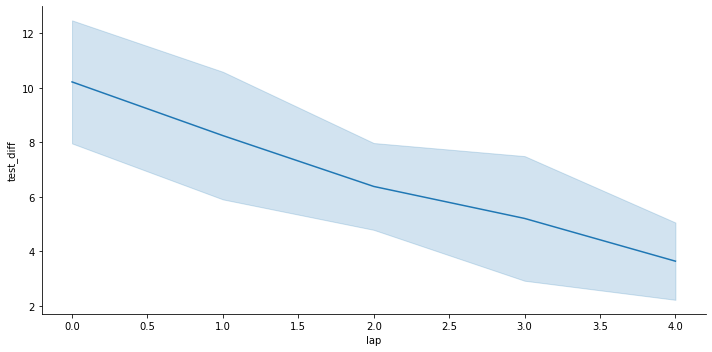

In [10]:

test_diff_list = []
for i in range(score.shape[0]):
    CA1_epoch_data_result[i]['lap'] = i+1
    entry = CA1_epoch_data_result[i]
    for j in range(len(entry['test_abs_diff'])):
        test_diff_list.append({
            'lap':j,
            'test_diff':entry['test_abs_diff'][j],
            'test_score':entry['test_score'][j]
        })
                   
test_diff_list_cp=pd.DataFrame(test_diff_list) 


g = sns.relplot(x="lap", y="test_diff", kind="line",ci="sd", data=test_diff_list_cp, aspect=2)
#ax = sns.boxplot(x="id", y="test_score", data=test_diff_list_cp)

median_width = 0.4
group_median_val=[]

    
plt.show()


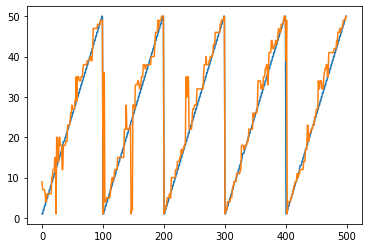

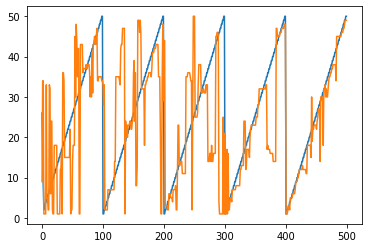

In [18]:
#print(valid_score)
#print(test_score)
plt.figure()
plt.plot(valid_group_pos)
plt.plot(res_valid)
plt.savefig('CA1_nB_validation.svg')

plt.figure()
plt.plot(test_group_pos)
plt.plot(res_test)

In [11]:
pkl_file = open('CA3_beh_nday1_new_onePF_all.pkl', 'rb')
G_CA3 = pickle.load(pkl_file)
pkl_file.close()

In [12]:
session_type=2
#train_range2 = (82, 122)
#test_range2 = (61,81)
#valid_range2 = (135,145 )
validation_lap_num=50
train_lap_num=35
test_lap_num=5
valid_lap_num=5
# train_range = (60, 100)
# test_range = (1,59)
# valid_range = (100,109 )
bins_before=6 #How many bins of neural data prior to the output are used for decoding
bins_current=1 #Whether to use concurrent time bin of neural data
bins_after=6 #How many bins of neural data after the output are used for decoding
group_bin=100
bin_num=50

start 36
poses 0.006908162107467652 0.6432871682739257
start 36
poses 0.007254070212841034 0.643158296409183
start 36
poses 0.007996755262613297 0.6435822112655639
start 40
poses 0.007284591516256333 0.6436025463835398
start 40
poses 0.0079255388879776 0.6432057681973775
start 40
poses 0.006704686751365662 0.6430328153864542
start 34
poses 0.00655208023428917 0.642768309841156
start 34
poses 0.007315112819671631 0.6426360471343994
start 34
poses 0.0059009590947628025 0.6425444944000244
start 32
poses 0.006959030946493149 0.6428700351015726
start 32
poses 0.0079458864235878 0.643460121084849
start 32
poses 0.007447371801137925 0.6429615878359476
start 36
poses 0.0068132069412867235 0.642829344997406
start 36
poses 0.006959030946493149 0.6427784624989827
start 36
poses 0.00774241106748581 0.6429412626520792
start 51
poses 0.0021875338459014892 0.639726347058614
start 51
poses 0.0046902807259559635 0.6399959338998794
start 51
poses 0.0027979599142074585 0.6403164131736755


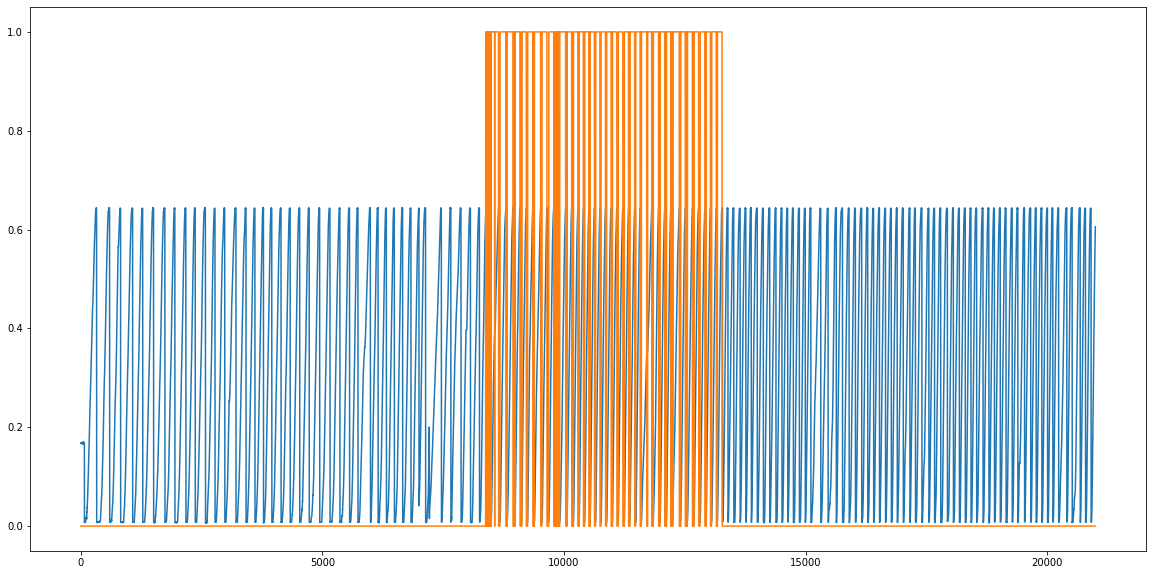

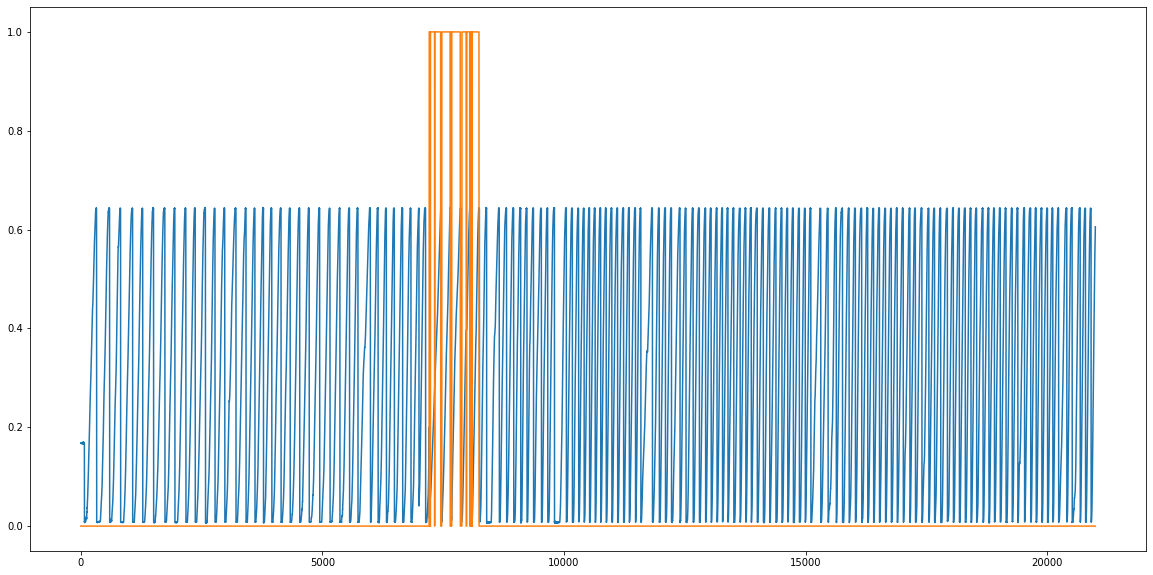

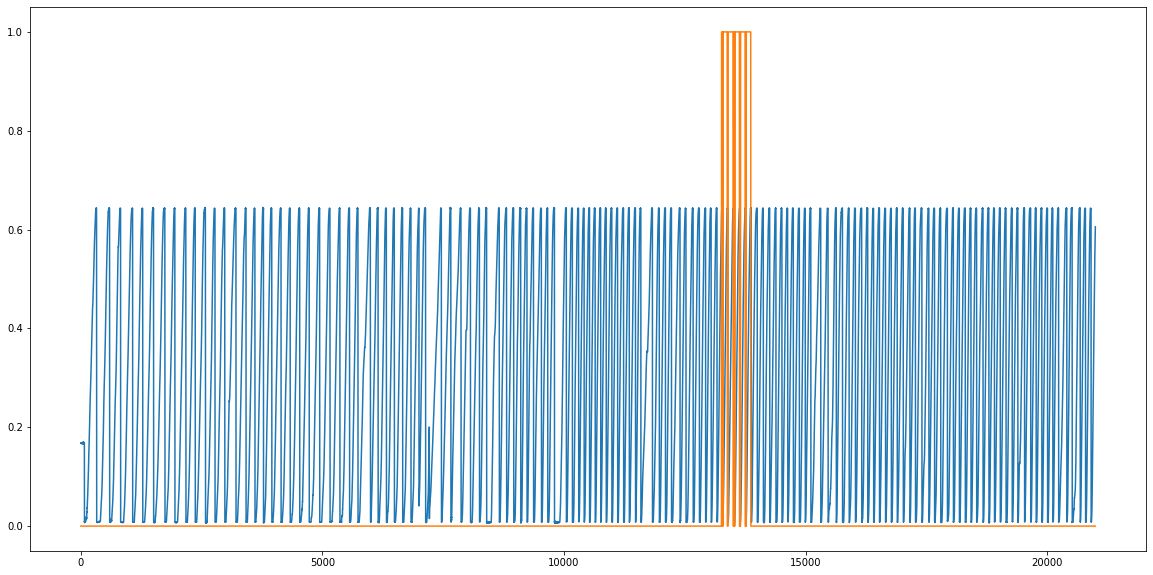

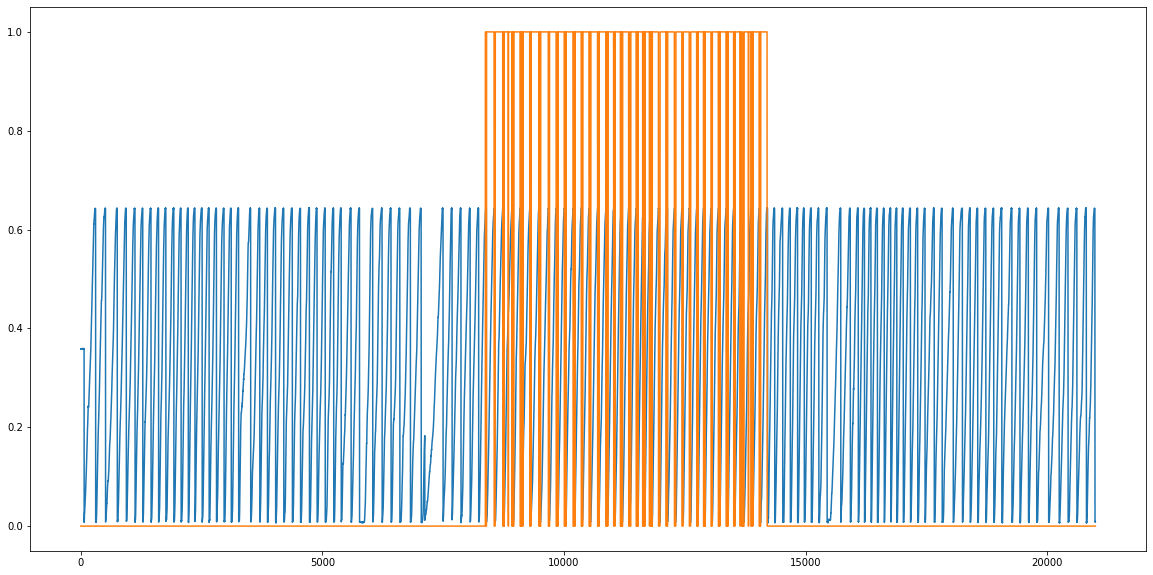

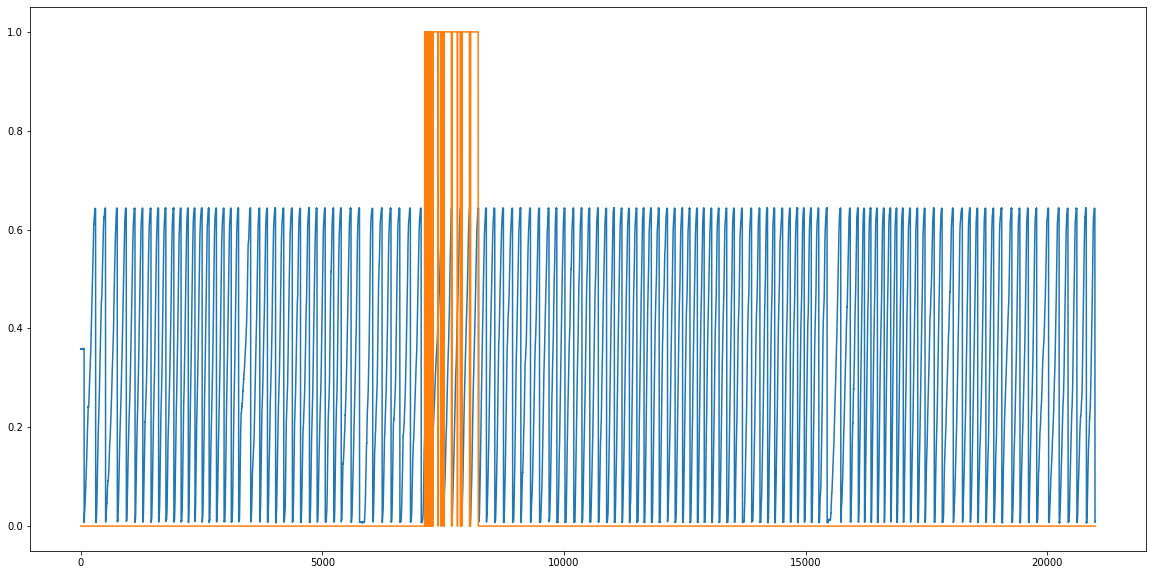

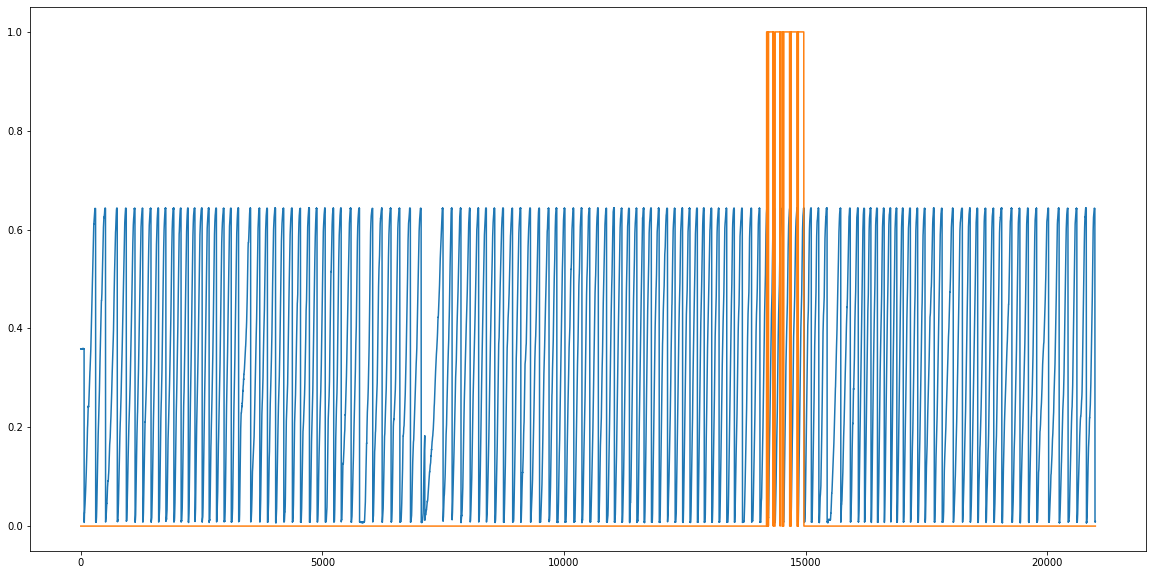

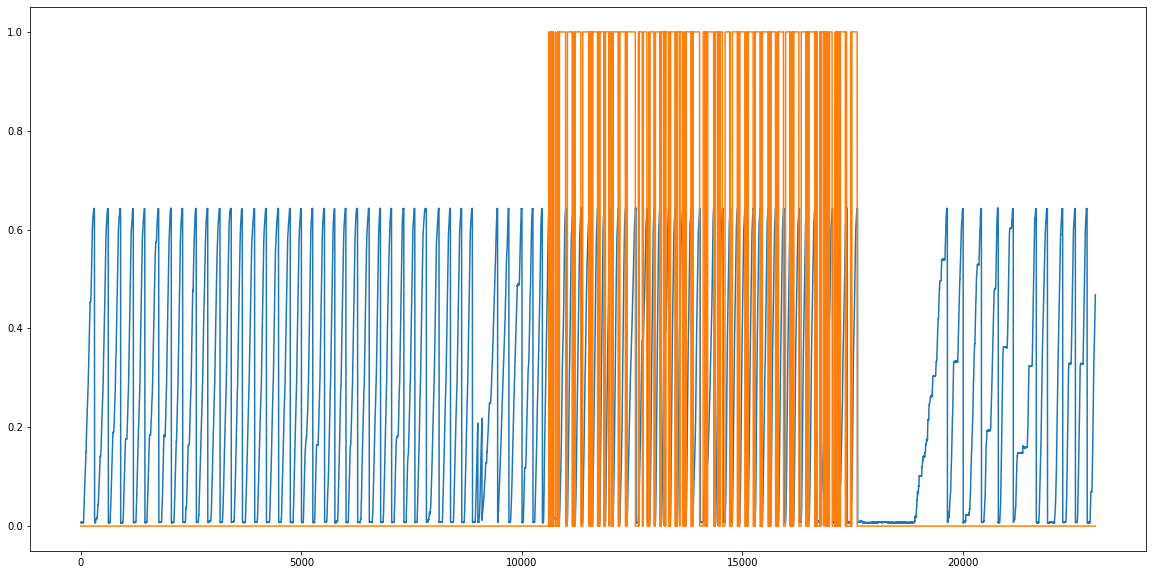

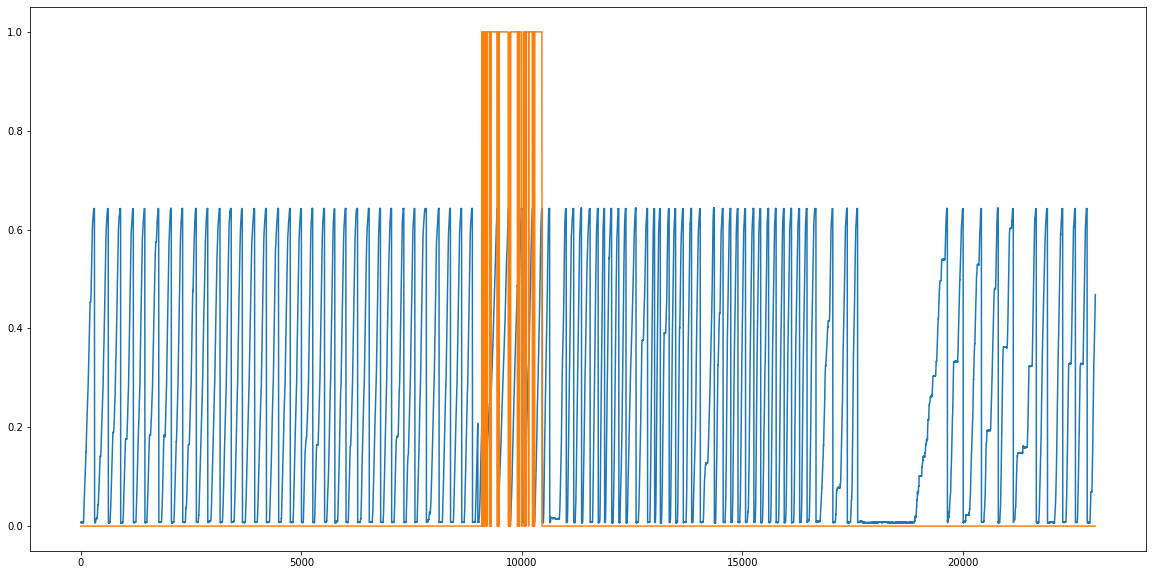

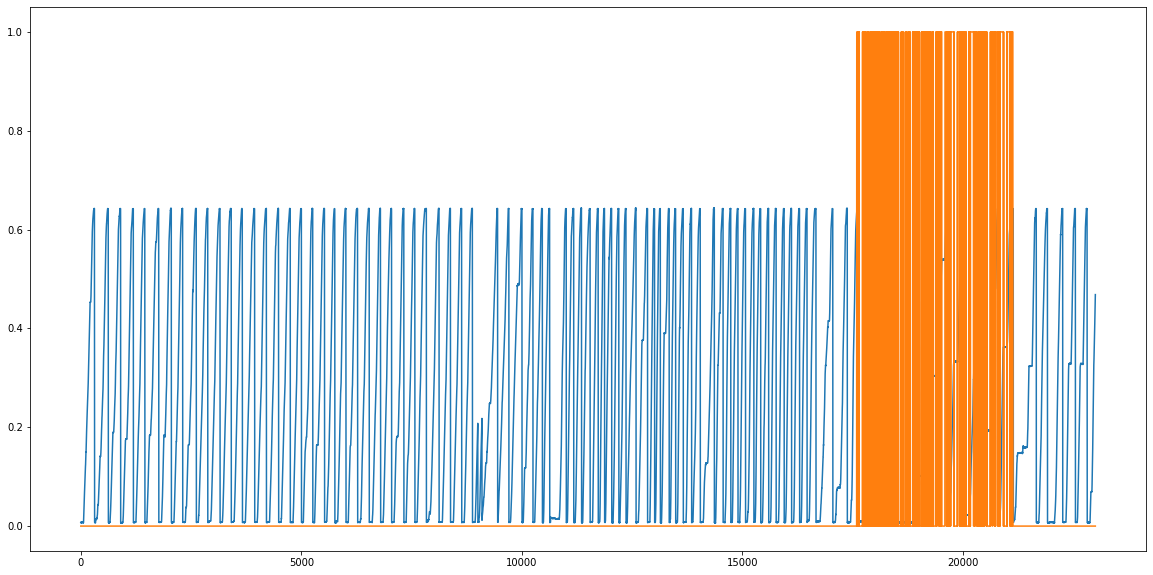

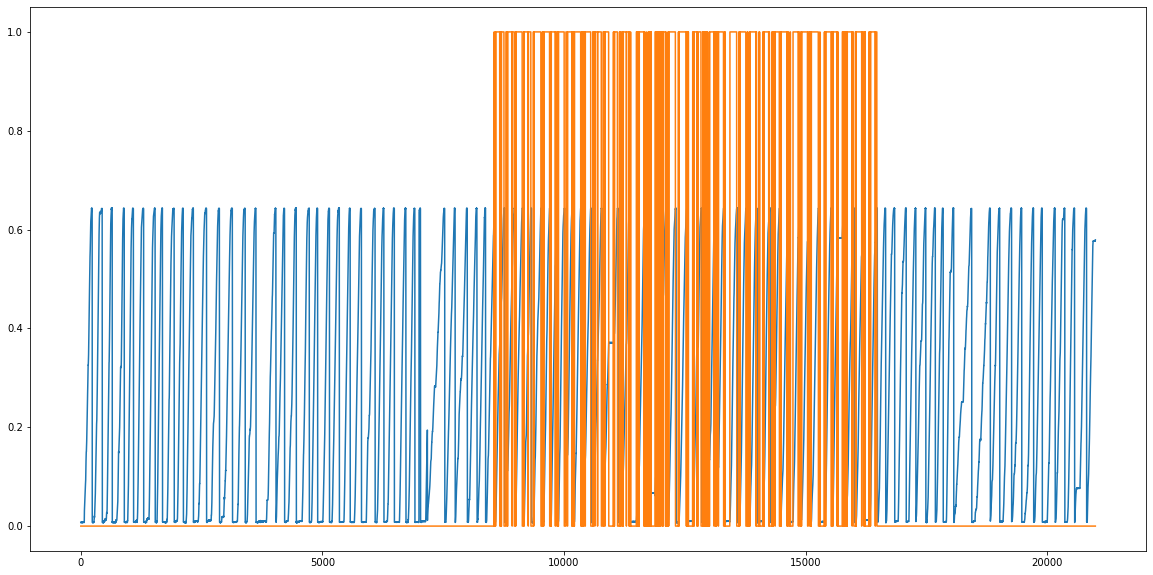

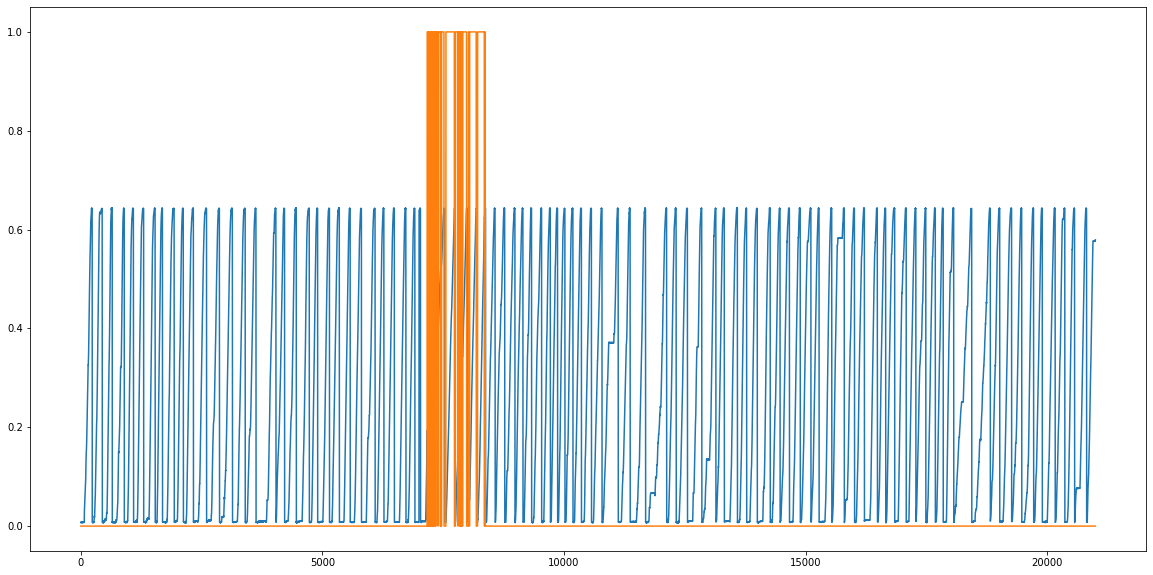

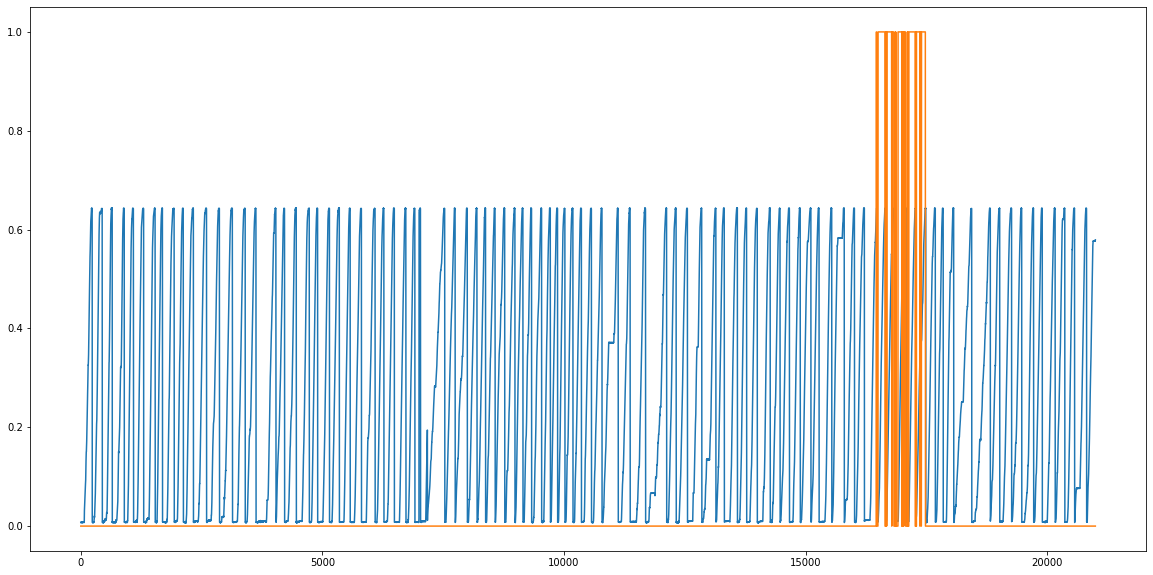

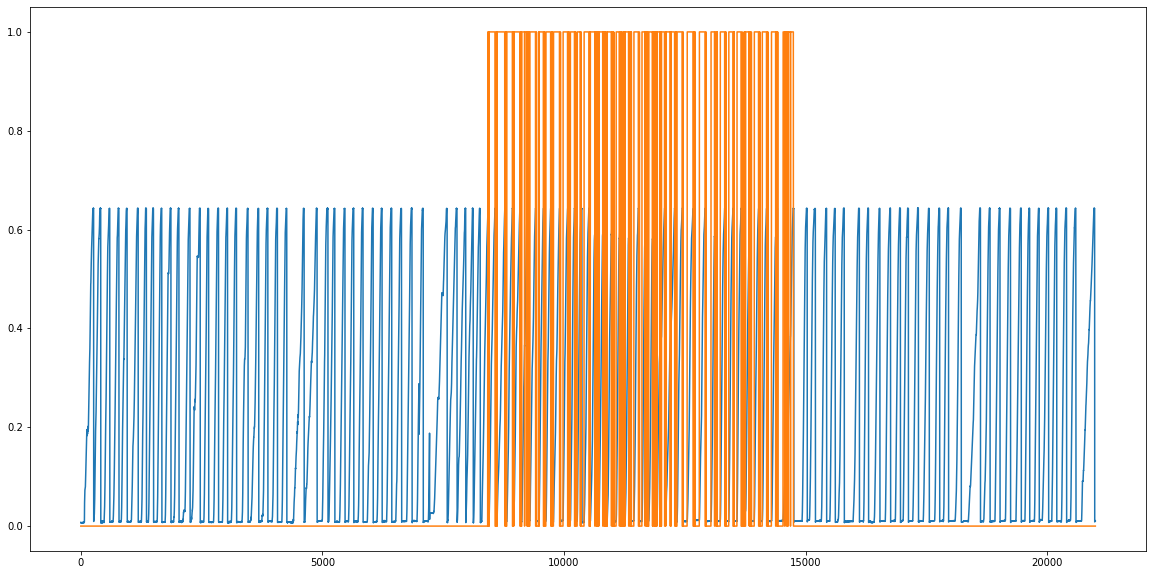

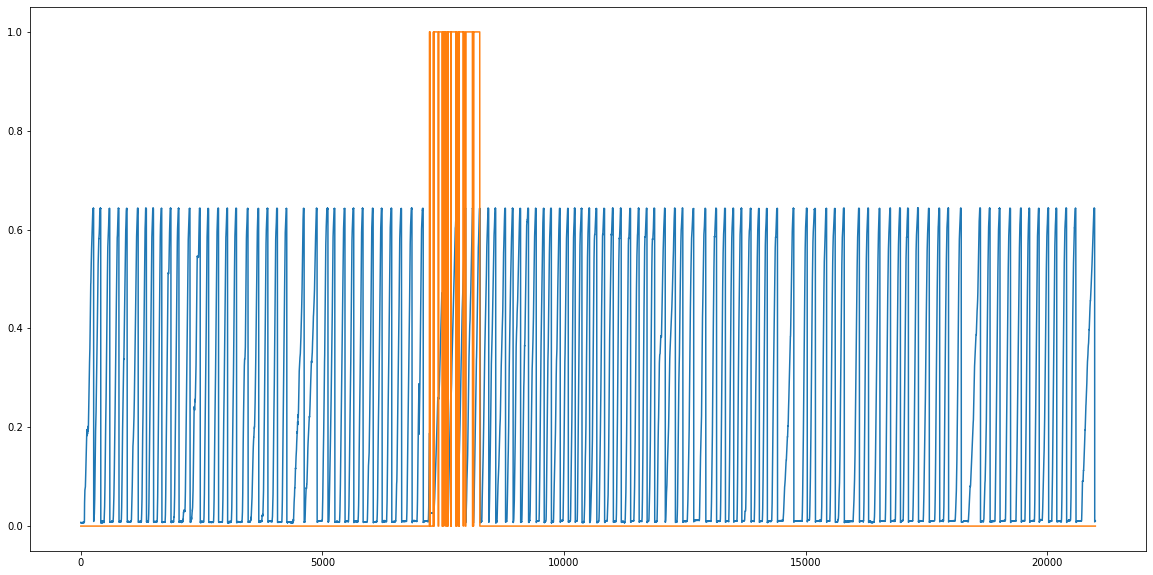

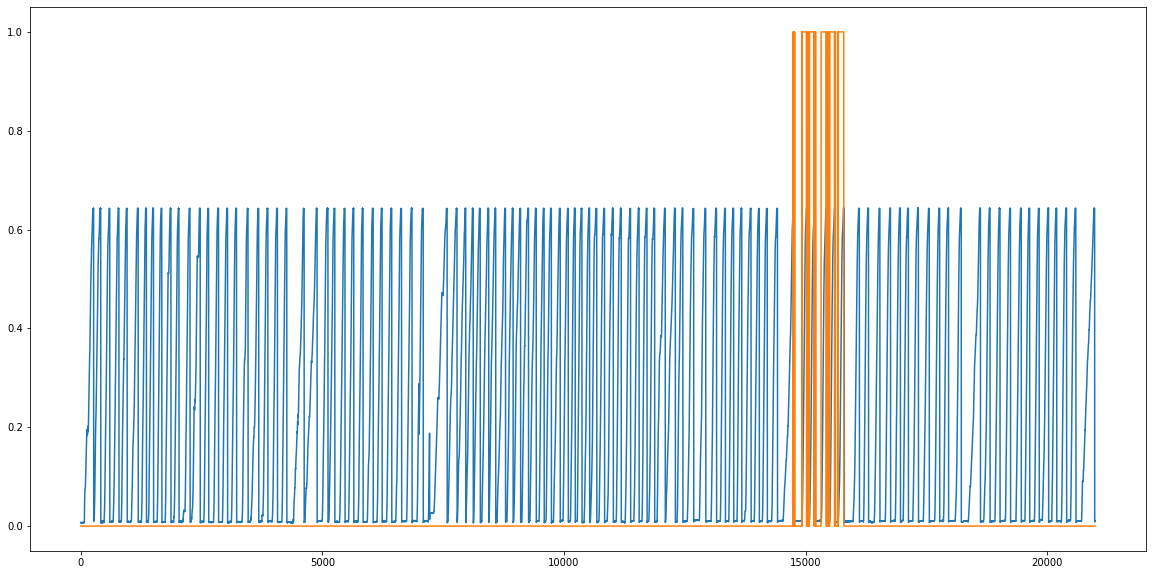

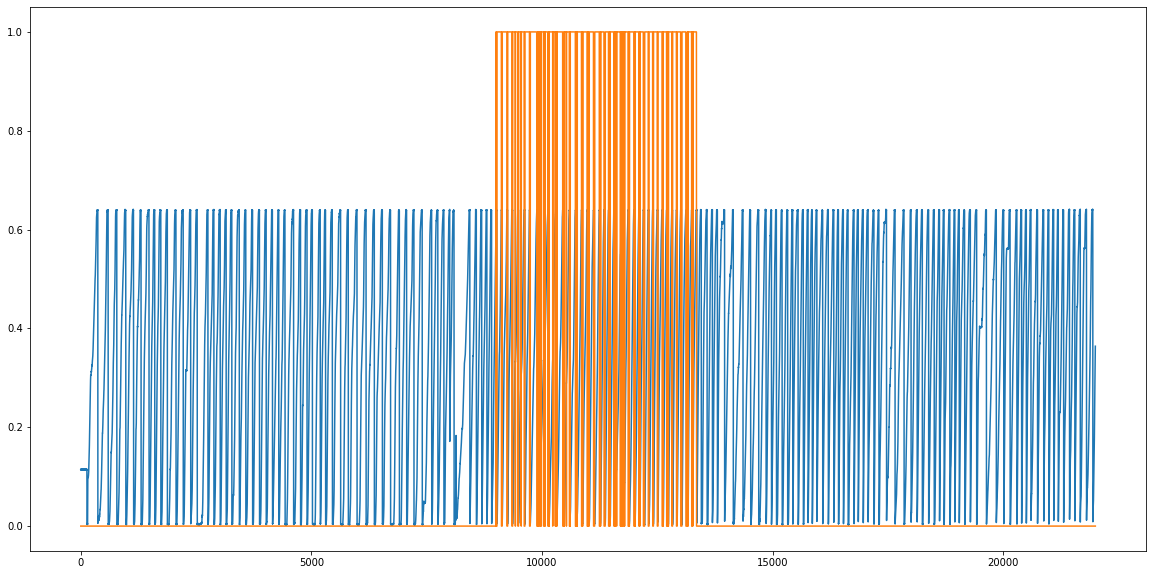

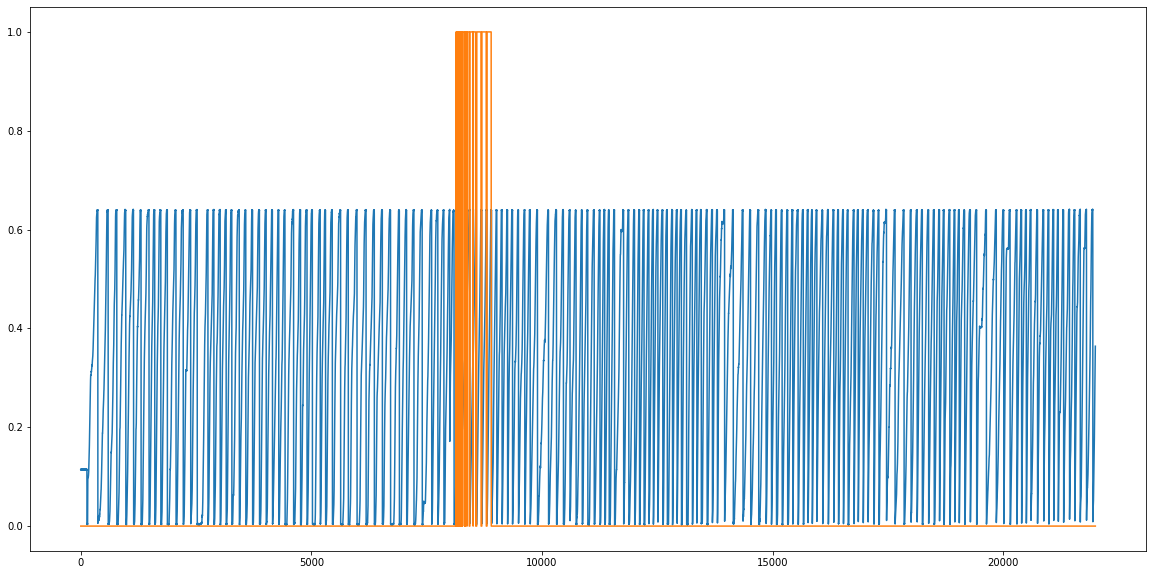

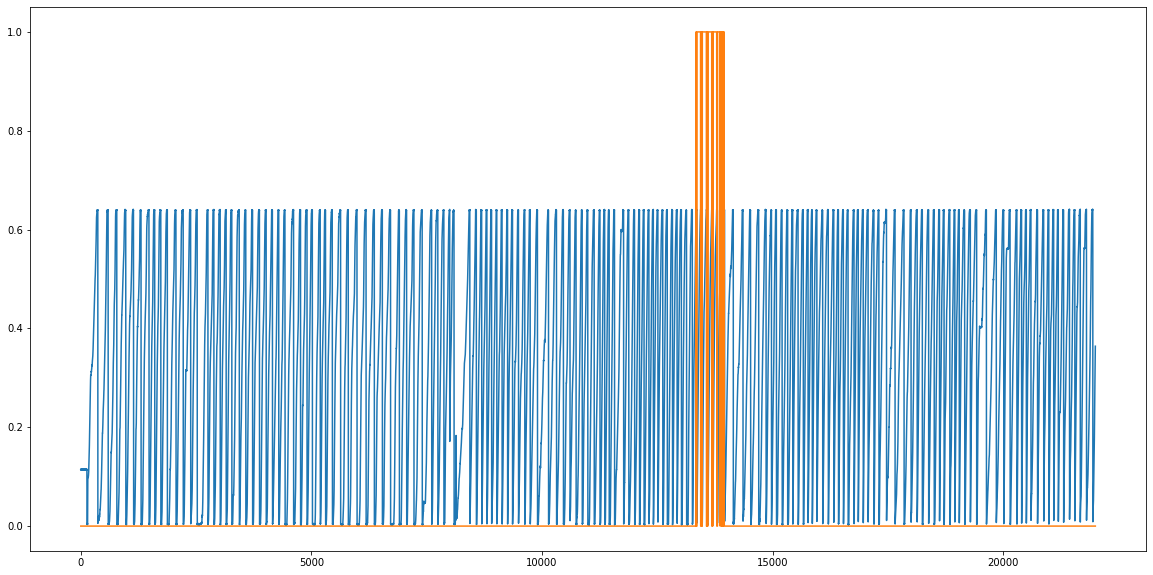

In [13]:
train_group_X=np.array([])
test_group_X=np.array([])
valid_group_X=np.array([])
PC_id=np.array([])
for key in G_CA3.keys():
    train_range=(G_CA3[key]['familiar_lap']+test_lap_num+1,G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+1)
    test_range=(G_CA3[key]['familiar_lap']+1,G_CA3[key]['familiar_lap']+test_lap_num+1)
    valid_range=(G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+1,G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+valid_lap_num+1)
    
    exp=G_CA3[key]['exp']
    pc_id=exp['PC_id']
    
    X_train,y_train,traingroup_X,train_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,session_type,bin_num,train_range)
    X_test,y_test,testgroup_X,test_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,2,bin_num,test_range)
    X_valid,y_valid,validgroup_X,valid_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,session_type,bin_num,valid_range)
    #test_group_pos[0:8]=1
    train_group_X = np.hstack((train_group_X, traingroup_X)) if train_group_X.size else traingroup_X
    test_group_X = np.hstack((test_group_X, testgroup_X)) if test_group_X.size else testgroup_X
    valid_group_X = np.hstack((valid_group_X, validgroup_X))if valid_group_X.size else validgroup_X
    PC_id = np.hstack((PC_id, pc_id))if PC_id.size else pc_id
    
train_group_X=remove_head_tail(train_group_X)
test_group_X=remove_head_tail(test_group_X)
valid_group_X=remove_head_tail(valid_group_X)
train_group_pos=remove_head_tail(train_group_pos)
test_group_pos=remove_head_tail(test_group_pos)
valid_group_pos=remove_head_tail(valid_group_pos)

In [14]:
ca3_X=train_group_X[:,PC_id==True]
ca3v_X=valid_group_X[:,PC_id==True]
ca3t_X=test_group_X[:,PC_id==True]
PC_num=200

trail_num=20;
score=np.zeros([trail_num,1])
diff=np.zeros([trail_num,1])
CA3_epoch_data_result=[]
for i in range (1):
    for trail in range(trail_num):

        CA3_X,CA3v_X,CA3t_X=nbget_random_sample(ca3_X,ca3v_X,ca3t_X,PC_num)
        #print(CA1_X.shape)

        from sklearn.naive_bayes import GaussianNB
        clf_ca3 = GaussianNB()
        clf_ca3.fit(CA3_X, train_group_pos)

        res_test = clf_ca3.predict(CA3t_X)
        res_valid = clf_ca3.predict(CA3v_X)
        valid_score = sklearn.metrics.r2_score(valid_group_pos, res_valid)
        print(valid_score)
        score[trail,i]  = sklearn.metrics.r2_score(test_group_pos, res_test)
        
        lap_s_v,lap_abs_d_v=get_lap_score(CA3v_X,valid_group_pos,clf_ca3,valid_lap_num)
        lap_s_test,lap_abs_d_test=get_lap_score(CA3t_X,test_group_pos,clf_ca3,test_lap_num)
        lap_s_train,lap_abs_d_train=get_lap_score(CA3_X,train_group_pos,clf_ca3,train_lap_num)

        CA3_epoch_data_result.append(dict(v_score=lap_s_v,v_abs_diff=lap_abs_d_v,
                                test_score=lap_s_test, test_abs_diff=lap_abs_d_test,
                                train_score=lap_s_train, train_abs_diff=lap_abs_d_train,
                                trail=trail))

0.6650025530778653
0.6957568573798057
0.8004711386524139
0.8049029816304227
0.6400806308768543
0.7725179125963146
0.6938670888372349
0.644963332339639
0.7154987033727545
0.7492075696600341
0.6652231859533939
0.7262905288062176
0.7334467081603184
0.7026444401897849
0.8038477809213731
0.7593183109994742
0.7620330546418477
0.8220547895193403
0.7676448038672485
0.801228964616186


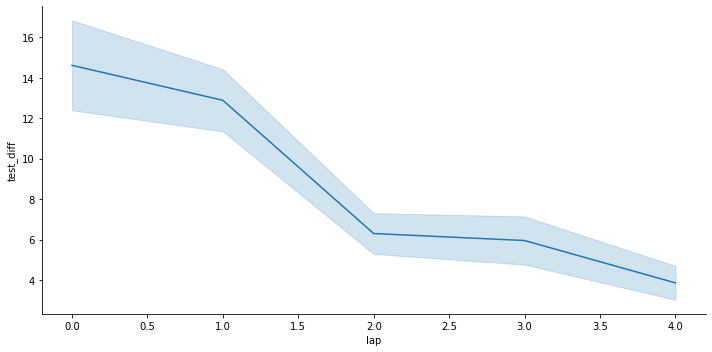

In [15]:
test_diff_list = []
for i in range(score.shape[0]):
    CA3_epoch_data_result[i]['lap'] = i+1
    entry = CA3_epoch_data_result[i]
    for j in range(len(entry['test_abs_diff'])):
        test_diff_list.append({
            'lap':j,
            'test_diff':entry['test_abs_diff'][j],
            'test_score':entry['test_score'][j]
        })
                   
test_diff_list_cp=pd.DataFrame(test_diff_list) 


g = sns.relplot(x="lap", y="test_diff", kind="line",ci="sd", data=test_diff_list_cp, aspect=2)
#ax = sns.boxplot(x="id", y="test_score", data=test_diff_list_cp)

median_width = 0.4
group_median_val=[]

    
plt.show()

0.7886912616459314
0.14087064123510018


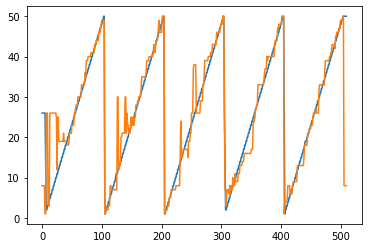

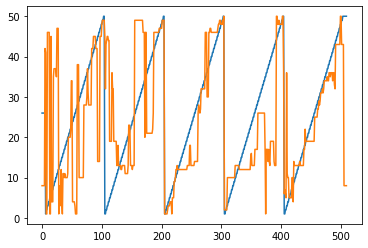

In [27]:
res_test = clf_ca3.predict(CA3t_X)
res_valid = clf_ca3.predict(CA3v_X)
valid_score = sklearn.metrics.r2_score(valid_group_pos, res_valid)
test_score = sklearn.metrics.r2_score(test_group_pos, res_test)
print(valid_score)
print(test_score)
plt.figure()
plt.plot(valid_group_pos)
plt.plot(res_valid)
plt.savefig('CA3_nB_validation.svg')

plt.figure()
plt.plot(test_group_pos)
plt.plot(res_test)

In [21]:
X=train_group_X[:,PC_id==True]
X.shape

(4012, 248)

In [34]:
CA3_epoch_data_result
len(CA3_epoch_data_result)

20

In [18]:
N_laps=CA3_epoch_data_result[0]['test_score'].shape[0]
N_trial=len(CA3_epoch_data_result)
for t in range(2):
    if t==0:
        new_pd_dict = [{'lap': i, 'trial': j, 'r2_score': CA1_epoch_data_result[j]['test_score'][i], 'predict_error':CA1_epoch_data_result[j]['test_abs_diff'][i],'type':'CA1'} for i in range(N_laps) for j in range(N_trial)]
    else:
        new_pd_dict += [{'lap': i, 'trial': j, 'r2_score': CA3_epoch_data_result[j]['test_score'][i], 'predict_error':CA3_epoch_data_result[j]['test_abs_diff'][i],'type':'CA3'} for i in range(N_laps) for j in range(N_trial)]
new_pd_result = pd.DataFrame(new_pd_dict)

CA1
CA3


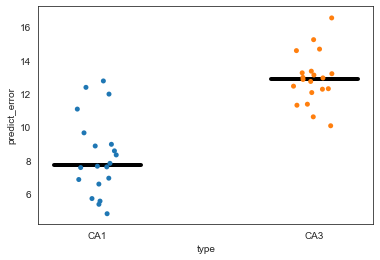

In [19]:
ax = sns.stripplot(x="type", y="predict_error", data=new_pd_result[new_pd_result.lap==1])

#g = sns.relplot(x="lap", y="predict_error", kind="line",ci="sd", data=CA1_pd_result, aspect=2)
sns.set_style("white")
#g.fig.autofmt_xdate()
#plt.ylim(0,18)
#g.savefig('CA1-CA3diff.png')
#g.figure.savefig('CA1-CA3_lap_dot.png')


median_width = 0.4

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = text.get_text()  # "X" or "Y"
    print(sample_name)
    # calculate the median value for all replicates of either X or Y
    #median_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.median()
    median_val = new_pd_result[(new_pd_result['lap']==1)&(new_pd_result['type']==sample_name)].predict_error.median()
    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k')
    
#plt.savefig('CA3_nB_1stlap.svg')

C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:244: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
 

DABEST v0.3.0
             
Good afternoon!
The current time is Thu Jun  4 17:03:14 2020.

The unpaired mean difference between CA1 and CA3 is 4.41 [95%CI 3.11, 5.81].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

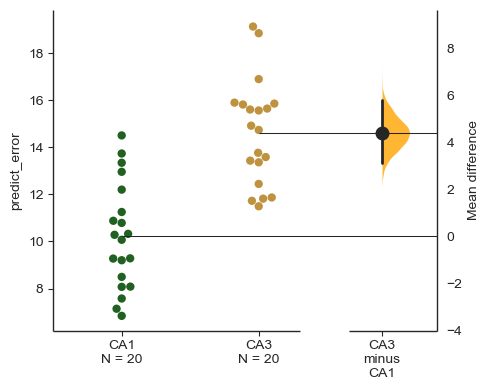

In [20]:
import dabest
error_dabest = dabest.load(data=new_pd_result[(new_pd_result['lap']==0)], x="type", y="predict_error",
                          idx=("CA1", "CA3"))

# Produce a Cumming estimation plot.
error_dabest.mean_diff.plot(custom_palette=["green","orange"]);
plt.savefig("CA1_CA3_first_lap_decoding_error_nB_dabest.svg")
error_dabest.mean_diff